In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# Logistic regression for imbalanced dataset

In [2]:
# generate and plot a synthetic imbalanced classification dataset

In [4]:
from collections import Counter
from sklearn.datasets import make_classification


In [5]:
# imbalanced dataset
x,y= make_classification(n_samples=1000 , n_features= 2 , n_clusters_per_class=1, 
                        n_redundant=0 , weights=[0.99], random_state=22)

In [6]:
x

array([[0.30327986, 0.48139074],
       [0.73969246, 0.91956165],
       [1.19664626, 1.11237246],
       ...,
       [1.95936248, 1.37677919],
       [2.35248069, 1.80043033],
       [1.37999245, 1.04924617]], shape=(1000, 2))

In [7]:
Counter(y)

Counter({np.int64(0): 987, np.int64(1): 13})

<Axes: xlabel='0', ylabel='1'>

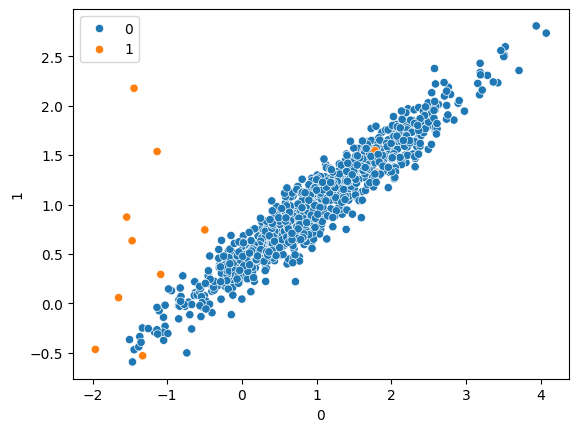

In [9]:
sns.scatterplot(x=pd.DataFrame(x)[0] ,y= pd.DataFrame(x)[1], hue=y)

In [11]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test= train_test_split(x,y,test_size=0.25 , random_state=33)

In [21]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
penalty=['l1' , 'l2','elasticnet']
c_value=[100,10,1.0,0.1 , 0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag' , 'saga']
class_weight=[{0:w, 1:y} for w in [1,10,50, 100] for y in [1,10 ,50 , 100]]


In [22]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [23]:
params=dict(penalty=penalty,C=c_value , solver=solver, class_weight=class_weight)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=logreg , param_grid=params , scoring='accuracy' , cv=5)

In [29]:
grid.fit(x_train , y_train)

C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sawan\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sawan\

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [30]:
grid.best_params_

{'C': 100, 'class_weight': {0: 100, 1: 50}, 'penalty': 'l1', 'solver': 'saga'}

In [31]:
y_pred=grid.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
score=accuracy_score(y_test, y_pred)
print(score)
cm=confusion_matrix(y_test, y_pred)
print(cm)
report=classification_report(y_test, y_pred)
print(report)

0.98
[[244   0]
 [  5   1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       1.00      0.17      0.29         6

    accuracy                           0.98       250
   macro avg       0.99      0.58      0.64       250
weighted avg       0.98      0.98      0.97       250

